# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import holidays
from datetime import date
import geopandas as gpd
from shapely.geometry import Point
import folium



# Read CSV

In [3]:
df_full = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/CBS_2021-2023_Full.csv')

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_47497/3192347137.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module01/Module01_Project03/data_provided/CBS_2021-2023_Full.csv')


# SneakPeak Data

## .head()

In [4]:
print('df_full')
print(df_full.head())


df_full
            ride_id  rideable_type           started_at             ended_at  \
0  5CB9DFCECF79AF84   classic_bike  2021-01-01 00:08:33  2021-01-01 00:33:53   
1  629E059504606547  electric_bike  2021-01-01 00:13:43  2021-01-01 00:29:34   
2  E74069873161EE33  electric_bike  2021-01-01 00:14:32  2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike  2021-01-01 00:15:45  2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike  2021-01-01 00:17:46  2021-01-01 00:21:00   

              start_station_name start_station_id  \
0          Maine Ave & 9th St SW          31646.0   
1                 10th & U St NW          31111.0   
2          17th & Corcoran St NW          31214.0   
3  Wilson Blvd. & N. Vermont St.          31926.0   
4              11th & Park Rd NW          31651.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                       NaN   

## .columns

In [5]:
print('df_full')
print(df_full.columns)


df_full
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


# ----------------------------------------------

# Full CSV

## Cleaning

### Check for Null

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


### Check for Null again

In [7]:
df_full.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

### Drop Nulls

In [8]:
df_full = df_full.dropna()
df_full.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

### Check for duplicated

In [9]:
df_full.duplicated().sum()

np.int64(0)

### Turn to lowerscase no space

In [10]:
df_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [11]:
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual


### Datetime

In [12]:
df_full['started_at'] = pd.to_datetime(df_full['started_at'])
df_full['ended_at'] = pd.to_datetime(df_full['ended_at'])
print(df_full['started_at'].info())
print(df_full['ended_at'].info())

df_full['year'] = df_full['started_at'].dt.year
df_full['month'] = df_full['started_at'].dt.month
df_full['weekday'] = df_full['started_at'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_full['weekday'] = pd.Categorical(df_full['weekday'], categories=weekday_order, ordered=True)


<class 'pandas.core.series.Series'>
Index: 9572692 entries, 0 to 10693995
Series name: started_at
Non-Null Count    Dtype         
--------------    -----         
9572692 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 146.1 MB
None
<class 'pandas.core.series.Series'>
Index: 9572692 entries, 0 to 10693995
Series name: ended_at
Non-Null Count    Dtype         
--------------    -----         
9572692 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 146.1 MB
None


### Weekday / Weekend

In [13]:

df_full['day_type'] = df_full['weekday'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

df_full['day_type']


0           Weekday
2           Weekday
3           Weekday
4           Weekday
6           Weekday
             ...   
10693991    Weekend
10693992    Weekend
10693993    Weekend
10693994    Weekend
10693995    Weekend
Name: day_type, Length: 9572692, dtype: object

### Holiday

In [14]:
# Define custom WA state holidays (if needed)
wa_holidays = holidays.US()
# Add any Washington-specific ones manually
wa_holidays.append({date(2025, 4, 16): "Washington State Holiday Example"})

# Check if a date is a holiday
print(date(2025, 7, 4) in wa_holidays)  # True (Independence Day)
print(wa_holidays.get(date(2025, 7, 4)))  # 'Independence Day'

df_full['holiday'] = df_full['started_at'].dt.date.apply(lambda holiday: 1 if holiday in wa_holidays else 0)

df_full['is_holiday'] = df_full['holiday'].map({0: 'No', 1: 'Yes'})
print(df_full['year'].unique())

#Check year 2021

df_full_weather_2021 = df_full[df_full['year'] == 2021].copy()
df_full_weather_2021.loc[:,'weekday_num'] = df_full_weather_2021['started_at'].dt.weekday
weekend_rows_2021 = df_full_weather_2021[df_full_weather_2021['weekday_num'] >= 5]

holiday_dates_weekend2021 = weekend_rows_2021[weekend_rows_2021['holiday'] == 1]['started_at'].dt.date.unique()
print(f"In 2021 there were {len(holiday_dates_weekend2021)} weekend days that were holidays")

#Check year 2022
df_full_weather_2022 = df_full[df_full['year'] == 2022].copy()
df_full_weather_2022.loc[:,'weekday_num'] = df_full_weather_2022['started_at'].dt.weekday
weekend_rows_2022 = df_full_weather_2022[df_full_weather_2022['weekday_num'] >= 5]

holiday_dates_weekend2022 = weekend_rows_2022[weekend_rows_2022['holiday'] == 1]['started_at'].dt.date.unique()
print(f"In 2022 there were {len(holiday_dates_weekend2022)} weekend days that were holidays")

#Check year 2023
df_full_weather_2023 = df_full[df_full['year'] == 2023].copy()
df_full_weather_2023.loc[:,'weekday_num'] = df_full_weather_2023['started_at'].dt.weekday
weekend_rows_2023 = df_full_weather_2023[df_full_weather_2023['weekday_num'] >= 5]

holiday_dates_weekend2023 = weekend_rows_2023[weekend_rows_2023['holiday'] == 1]['started_at'].dt.date.unique()
print(f"In 2023 there were {len(holiday_dates_weekend2023)} weekend days that were holidays")






True
Independence Day
[2021 2022 2023]
In 2021 there were 3 weekend days that were holidays
In 2022 there were 3 weekend days that were holidays
In 2023 there were 2 weekend days that were holidays


### Season CHECK !!

In [15]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return 1
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return 2
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return 3
    else:
        return 4

df_full['season'] = df_full['started_at'].apply(get_season)

df_full.loc[df_full['season'] == 1, 'season_name'] = 'Winter'
df_full.loc[df_full['season'] == 2, 'season_name'] = 'Spring'
df_full.loc[df_full['season'] == 3, 'season_name'] = 'Summer'
df_full.loc[df_full['season'] == 4, 'season_name'] = 'Fall'



df_full['season'].isnull().sum()

np.int64(0)

### Weather

In [16]:
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,year,month,weekday,day_type,holiday,is_holiday,season,season_name
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,-77.072305,member,2021,1,Friday,Weekday,1,Yes,1,Winter
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,-77.031691,member,2021,1,Friday,Weekday,1,Yes,1,Winter
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,-77.114563,member,2021,1,Friday,Weekday,1,Yes,1,Winter
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,-77.032956,member,2021,1,Friday,Weekday,1,Yes,1,Winter
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,-76.988039,casual,2021,1,Friday,Weekday,1,Yes,1,Winter


### Time and Date Separate

In [17]:
# I wanted to separate time and date and fidn a way to wrap aroudn time but realised that you cant have time without date. 


### Ride Length

In [18]:
# Find a pattern in this mistake. 
# This could be one of the targets of our talk, to fix their accuracy. 
# Is it all in the same geolocation? What is the similarity between all of these negative ones. 

In [19]:
# I had 385 negative numbers so I decided to drop them as it is not significant given the size of our data. 

In [20]:
cross_midnight = df_full[df_full['ended_at'] < df_full['started_at']]
print(f"Number of rides crossing midnight or with negative duration: {len(cross_midnight)}")

df_full = df_full.drop(cross_midnight.index)
# print(cross_midnight[['started_at', 'ended_at', 'ride_duration_min']].head(10))



Number of rides crossing midnight or with negative duration: 385


In [21]:
df_full['ride_duration_min'] = df_full['ended_at'] - df_full['started_at']
df_full['ride_duration_min'] = (df_full['ride_duration_min'].dt.total_seconds() / 60).round(2)
df_full['ride_duration_min']

print("Min duration (minutes):", df_full['ride_duration_min'].min())
print("Max duration (minutes):", df_full['ride_duration_min'].max())
print("Median duration (minutes):", df_full['ride_duration_min'].median())

Min duration (minutes): 0.0
Max duration (minutes): 54540.47
Median duration (minutes): 11.55


### Ride Length Outliers

In [22]:
Q1 = df_full['ride_duration_min'].quantile(0.25)
Q3 = df_full['ride_duration_min'].quantile(0.75)

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
upper_bound_updated = 120

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Q1 (25th percentile): 6.7
Q3 (75th percentile): 20.28
Lower bound: -13.670000000000005
Upper bound: 40.650000000000006


In [23]:
outliers = df_full[df_full['ride_duration_min'] > upper_bound_updated]
print(len(outliers))
print(outliers['ride_duration_min'].describe())

118726
count    118726.000000
mean        354.749374
std        1233.299364
min         120.020000
25%         136.280000
50%         162.430000
75%         232.720000
max       54540.470000
Name: ride_duration_min, dtype: float64


In [24]:
between_40_and_120 = df_full[(df_full['ride_duration_min'] > 120) & (df_full['ride_duration_min'] <= 200)]
print(f"Number of rides between 40 and 120 minutes: {len(between_40_and_120)}")

Number of rides between 40 and 120 minutes: 80045


In [25]:
df_full = df_full[df_full['ride_duration_min'] <= upper_bound_updated]

In [26]:
df_full['ride_duration_min'] = df_full['ended_at'] - df_full['started_at']
df_full['ride_duration_min'] = (df_full['ride_duration_min'].dt.total_seconds() / 60).round(2)
df_full['ride_duration_min']

print("Min duration (minutes):", df_full['ride_duration_min'].min())
print("Max duration (minutes):", df_full['ride_duration_min'].max())
print("Median duration (minutes):", df_full['ride_duration_min'].median())

Min duration (minutes): 0.0
Max duration (minutes): 120.0
Median duration (minutes): 11.42


### GeoData

In [27]:
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,year,month,weekday,day_type,holiday,is_holiday,season,season_name,ride_duration_min
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,member,2021,1,Friday,Weekday,1,Yes,1,Winter,25.33
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,member,2021,1,Friday,Weekday,1,Yes,1,Winter,14.22
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,member,2021,1,Friday,Weekday,1,Yes,1,Winter,5.58
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,member,2021,1,Friday,Weekday,1,Yes,1,Winter,3.23
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,casual,2021,1,Friday,Weekday,1,Yes,1,Winter,17.37


In [28]:

# df_full_copy = df_full.copy()

df_full['geometry_start'] = gpd.points_from_xy(df_full['start_lng'], df_full['start_lat'])
df_full['geometry_end'] = gpd.points_from_xy(df_full['end_lng'], df_full['end_lat'])

gdf_full = gpd.GeoDataFrame(df_full, geometry='geometry_start')
gdf_full = gdf_full.set_geometry('geometry_end')


print(gdf_full.head())
print(type(gdf_full))

            ride_id  rideable_type          started_at            ended_at  \
0  5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:33 2021-01-01 00:33:53   
2  E74069873161EE33  electric_bike 2021-01-01 00:14:32 2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike 2021-01-01 00:15:45 2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:46 2021-01-01 00:21:00   
6  0535306B61EF92F9   classic_bike 2021-01-01 00:19:06 2021-01-01 00:36:28   

               start_station_name start_station_id  \
0           Maine Ave & 9th St SW          31646.0   
2           17th & Corcoran St NW          31214.0   
3   Wilson Blvd. & N. Vermont St.          31926.0   
4               11th & Park Rd NW          31651.0   
6  Bladensburg Rd & Benning Rd NE          31617.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
2                      14th & Belmont St NW        31119.0  

### start_station_id to INT

In [29]:
df_full['start_station_id'] = df_full['start_station_id'].astype('float').astype('Int64')
df_full['end_station_id'] = df_full['end_station_id'].astype('float').astype('Int64')

df_full['end_station_id'].info()

<class 'pandas.core.series.Series'>
Index: 9453581 entries, 0 to 10693993
Series name: end_station_id
Non-Null Count    Dtype
--------------    -----
9453581 non-null  Int64
dtypes: Int64(1)
memory usage: 153.3 MB


In [30]:
df_full.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,weekday,day_type,holiday,is_holiday,season,season_name,ride_duration_min,geometry_start,geometry_end
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,...,1,Friday,Weekday,1,Yes,1,Winter,25.33,POINT (-77.02524 38.88044),POINT (-77.0723 38.8946)
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,...,1,Friday,Weekday,1,Yes,1,Winter,14.22,POINT (-77.03857 38.91214),POINT (-77.03169 38.92087)
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,...,1,Friday,Weekday,1,Yes,1,Winter,5.58,POINT (-77.11456 38.87948),POINT (-77.11456 38.87948)
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,...,1,Friday,Weekday,1,Yes,1,Winter,3.23,POINT (-77.02825 38.93132),POINT (-77.03296 38.93199)
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,Good Hope Rd & MLK Ave SE,31802,38.900413,-76.982872,...,1,Friday,Weekday,1,Yes,1,Winter,17.37,POINT (-76.98287 38.90041),POINT (-76.98804 38.86737)
8,CB36F43FA77E4A35,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632,1st & M St SE,31650,38.897195,-76.983575,...,1,Friday,Weekday,1,Yes,1,Winter,12.20,POINT (-76.98358 38.8972),POINT (-77.00607 38.87689)
9,874D92427D41BC30,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,...,1,Friday,Weekday,1,Yes,1,Winter,9.47,POINT (-77.03269 38.9344),POINT (-77.03201 38.91305)
10,24ECE930048A9B67,classic_bike,2021-01-01 00:23:05,2021-01-01 00:37:02,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,31619,38.890461,-76.988355,...,1,Friday,Weekday,1,Yes,1,Winter,13.95,POINT (-76.98836 38.89046),POINT (-76.98836 38.89046)
11,DA579474AAD89387,classic_bike,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,...,1,Friday,Weekday,1,Yes,1,Winter,23.58,POINT (-77.04938 38.89054),POINT (-77.03169 38.89963)
12,1DE392338FF58AC7,classic_bike,2021-01-01 00:24:12,2021-01-01 00:47:54,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,...,1,Friday,Weekday,1,Yes,1,Winter,23.70,POINT (-77.04938 38.89054),POINT (-77.03169 38.89963)


## EDA

### Length of Ride Count

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_47497/3891041089.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


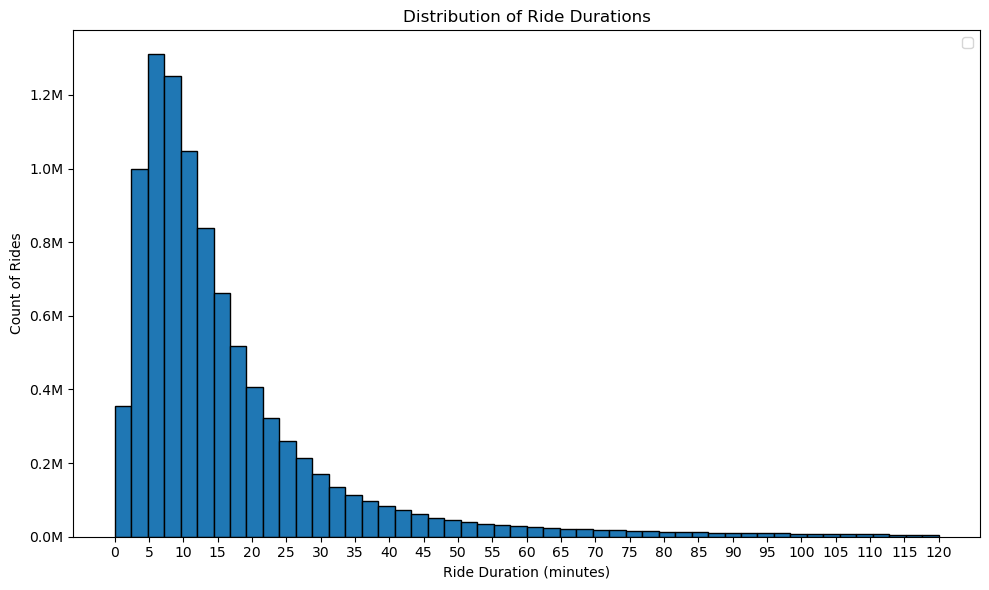

In [86]:
plt.figure(figsize=(10,6))  # Optional: set figure size for readability
plt.hist(df_full['ride_duration_min'], bins=50, edgecolor='black')  # bins = how many bars
plt.xlabel('Ride Duration (minutes)')
plt.xticks(range(0, 121, 5))
plt.ylabel('Count of Rides')
plt.title('Distribution of Ride Durations')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

plt.tight_layout()
plt.legend()
plt.show()


/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_47497/2371007458.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


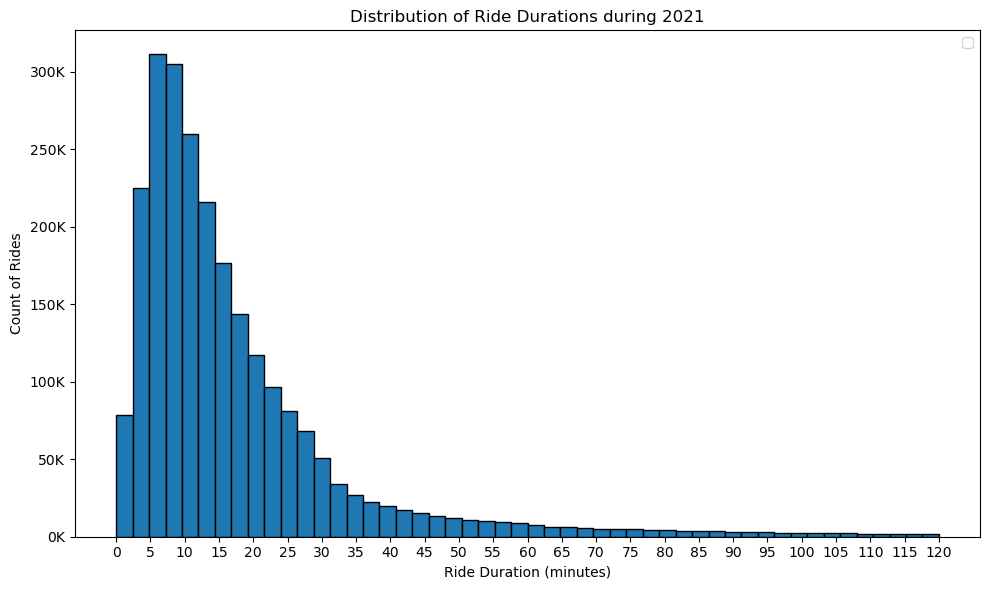

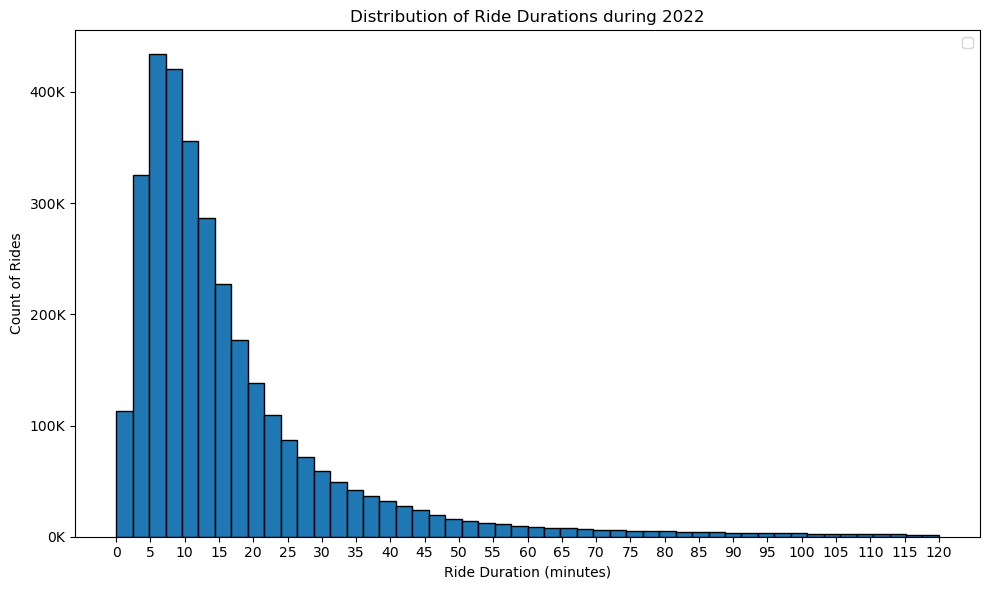

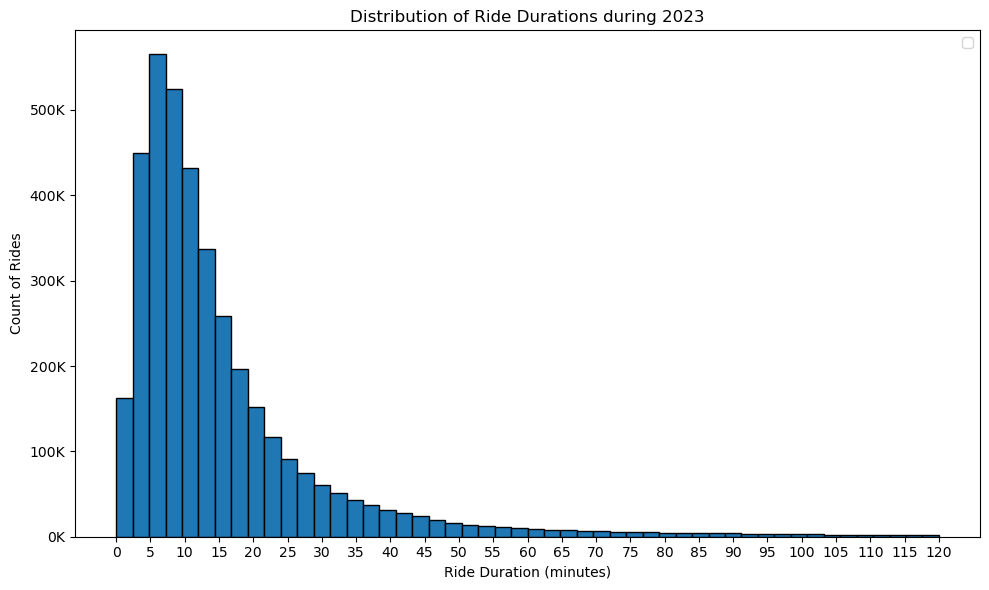

In [87]:
unique_years = sorted(df_full['year'].unique())

for year in unique_years:
    plt.figure(figsize=(10,6))  # Optional: set figure size for readability
    data_year = df_full[df_full['year'] == year]
    plt.hist(data_year['ride_duration_min'], bins=50, edgecolor='black')  # bins = how many bars
    plt.xlabel('Ride Duration (minutes)')
    plt.xticks(range(0, 121, 5))
    plt.ylabel('Count of Rides')
    plt.title(f'Distribution of Ride Durations during {year}')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-3:.0f}K'))

    plt.tight_layout()
    plt.legend()
    plt.show()  

### Length Ride Weekday vs Weekend

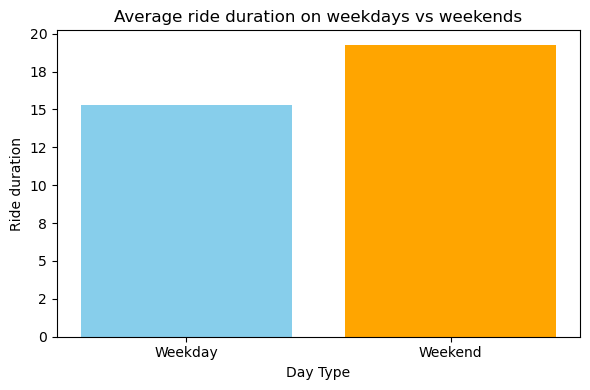

In [38]:
weekday_avg = df_full[df_full['day_type'] == 'Weekday']['ride_duration_min'].mean()

weekend_avg = df_full[df_full['day_type'] == 'Weekend']['ride_duration_min'].mean()


averages = [weekday_avg, weekend_avg]
labels = ['Weekday', 'Weekend']

plt.figure(figsize=(6,4))
plt.bar(labels, averages, color=['skyblue', 'orange'])

plt.xlabel('Day Type')
plt.ylabel('Ride duration')
plt.title(f'Average ride duration on weekdays vs weekends')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))

plt.tight_layout()

plt.show()  


/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_47497/1983653534.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


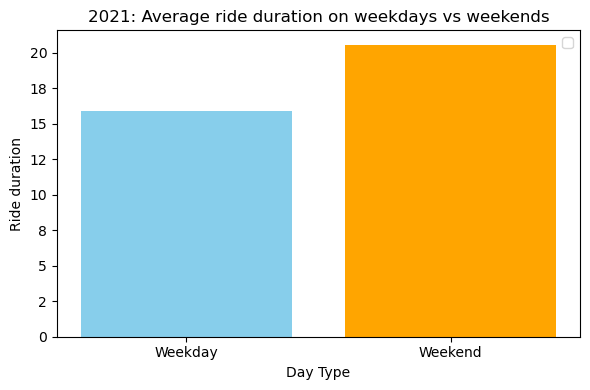

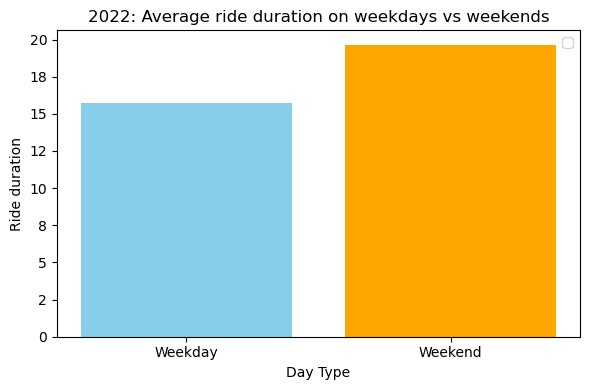

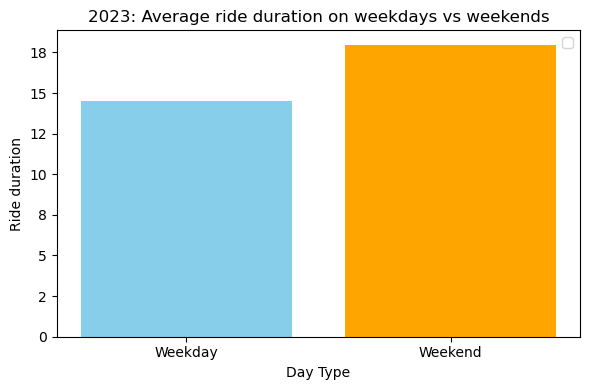

In [39]:
unique_years = sorted(df_full['year'].unique())

weekday_avg = df_full[df_full['day_type'] == 'Weekday']['ride_duration_min'].mean()

weekend_avg = df_full[df_full['day_type'] == 'Weekend']['ride_duration_min'].mean()


labels = ['Weekday', 'Weekend']


for year in unique_years:

    df_year = df_full[df_full['year'] == year]

    weekday_avg_unique = df_year[df_year['day_type'] == 'Weekday']['ride_duration_min'].mean()

    weekend_avg_unique = df_year[df_year['day_type'] == 'Weekend']['ride_duration_min'].mean()
    averages_unique = [weekday_avg_unique, weekend_avg_unique]

    plt.figure(figsize=(6,4))
    plt.bar(labels, averages_unique, color=['skyblue', 'orange'])

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))
    
    plt.xlabel('Day Type')
    plt.ylabel('Ride duration')
    plt.title(f'{year}: Average ride duration on weekdays vs weekends')
    plt.tight_layout()
    plt.legend()
    plt.show()  

### Length Ride Weekday comparison

In [40]:
df_full.weekday

0           Friday
2           Friday
3           Friday
4           Friday
6           Friday
             ...  
10693989    Sunday
10693990    Sunday
10693991    Sunday
10693992    Sunday
10693993    Sunday
Name: weekday, Length: 9453581, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_47497/2356246123.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df_full.groupby('weekday')['ride_duration_min'].mean().reset_index()


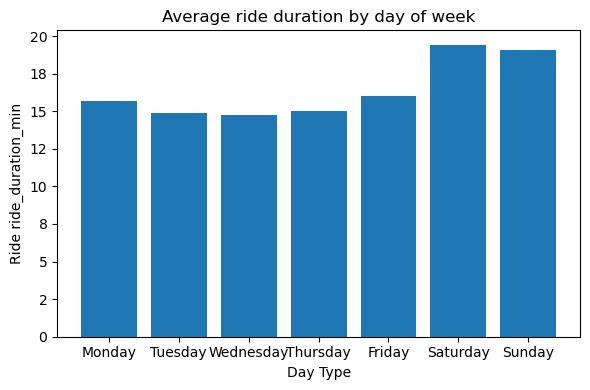

In [42]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Get the weekday avarage for each day of the week. 
weekday_avg = df_full.groupby('weekday')['ride_duration_min'].mean().reset_index()

# Make 'weekday' a categorical column with the desired order
weekday_avg['weekday'] = pd.Categorical(weekday_avg['weekday'], categories=weekday_order, ordered=True)

# Sort by this categorical order
weekday_avg = weekday_avg.sort_values('weekday')

plt.figure(figsize=(6,4))
plt.bar(weekday_avg['weekday'], weekday_avg['ride_duration_min'])

plt.xlabel('Day Type')
plt.ylabel('Ride ride_duration_min')
plt.title(f'Average ride duration by day of week')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))

plt.tight_layout()

plt.show()  

### MAPS

#### Main Map

In [43]:
df_full.start_lng

0          -77.025236
2          -77.038568
3          -77.114563
4          -77.028247
6          -76.982872
              ...    
10693989   -77.046570
10693990   -77.041829
10693991   -76.995234
10693992   -77.055911
10693993   -76.995396
Name: start_lng, Length: 9453581, dtype: float64

In [44]:
f = folium.Figure(width=1500, height=500)
m = folium.Map(location=[38.884185,-76.995396], zoom_start=10, max_zoom=18, min_zoom=0).add_to(f)

#### Filtering through top 20 stations. 

In [45]:
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,weekday,day_type,holiday,is_holiday,season,season_name,ride_duration_min,geometry_start,geometry_end
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,...,1,Friday,Weekday,1,Yes,1,Winter,25.33,POINT (-77.02524 38.88044),POINT (-77.0723 38.8946)
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,...,1,Friday,Weekday,1,Yes,1,Winter,14.22,POINT (-77.03857 38.91214),POINT (-77.03169 38.92087)
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,...,1,Friday,Weekday,1,Yes,1,Winter,5.58,POINT (-77.11456 38.87948),POINT (-77.11456 38.87948)
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,...,1,Friday,Weekday,1,Yes,1,Winter,3.23,POINT (-77.02825 38.93132),POINT (-77.03296 38.93199)
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,Good Hope Rd & MLK Ave SE,31802,38.900413,-76.982872,...,1,Friday,Weekday,1,Yes,1,Winter,17.37,POINT (-76.98287 38.90041),POINT (-76.98804 38.86737)


In [50]:
df_full.start_station_name

0                                       Maine Ave & 9th St SW
2                                       17th & Corcoran St NW
3                               Wilson Blvd. & N. Vermont St.
4                                           11th & Park Rd NW
6                              Bladensburg Rd & Benning Rd NE
                                  ...                        
10693989     Ohio Dr & West Basin Dr SW / MLK & FDR Memorials
10693990                          18th & New Hampshire Ave NW
10693991    Eastern Market Metro / Pennsylvania Ave & 8th ...
10693992                                  King St & Peyton St
10693993    Eastern Market Metro / Pennsylvania Ave & 8th ...
Name: start_station_name, Length: 9453581, dtype: object

In [69]:
df_stationid = df_full.groupby('start_station_id')[['start_lat','start_lng', 'start_station_name']].first().reset_index()
df_stationid['start_station_id'] = df_stationid['start_station_id'].astype('category')
df_stationid.info()
print('=========')
print('=========')
print('=========')
print('=========')
print('=========')
print('=========')
# groups by and creates a name for the new column
ride_counts = df_full.groupby('start_station_id').size().reset_index(name='ride_count')
# creates a new dataframe with a filter of only the top 20 stations. 
top_20 = ride_counts.sort_values('ride_count', ascending=False).head(20)
# creates a new DF with only the stations from df_stationid that are on the top_20 stations DF, note this one only has station names but no ride count. 
top_20_stations = df_stationid[df_stationid['start_station_id'].isin(top_20['start_station_id'])]
# Merges top_20_stations with top_20 so that we have station name + ride count. 
top_20_stations = top_20_stations.merge(top_20, on='start_station_id')
print(top_20_stations)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   start_station_id    773 non-null    category
 1   start_lat           773 non-null    float64 
 2   start_lng           773 non-null    float64 
 3   start_station_name  773 non-null    object  
dtypes: category(1), float64(2), object(1)
memory usage: 42.7+ KB
    start_station_id  start_lat  start_lng  \
0              31101  38.917764 -77.032096   
1              31125  38.919018 -77.034449   
2              31200  38.910100 -77.044400   
3              31201  38.909892 -77.034337   
4              31202  38.913046 -77.032008   
5              31203  38.908600 -77.032300   
6              31214  38.912138 -77.038568   
7              31229  38.915544 -77.038252   
8              31247  38.888553 -77.032427   
9              31248  38.888774 -77.028694   
10             31258  38

In [64]:
df_full.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'weekday', 'day_type', 'holiday',
       'is_holiday', 'season', 'season_name', 'ride_duration_min',
       'geometry_start', 'geometry_end'],
      dtype='object')

#### Adding Markers and Names 

In [ ]:
top_20_stations['start_station_name'] = top_20_stations['start_station_name'].str.replace('\n', ' ').str.strip()

f = folium.Figure(width=1500, height=500)

m = folium.Map(location=[top_20_stations['start_lat'].mean(), top_20_stations['start_lng'].mean()], zoom_start=12)

for lat, lon, name, count in zip(top_20_stations['start_lat'], top_20_stations['start_lng'], top_20_stations['start_station_name'], top_20_stations['ride_count']):
    popup_html = f'<div style="white-space: nowrap;">{name} | Rides: {count}</div>'
    folium.Marker([lat, lon], popup=folium.Popup(popup_html, max_width=350)).add_to(m)

m

#### Why did we choose the top 20 stations?

In [78]:
# Total rides in the dataset
total_rides = len(df_full)

# Total rides from the top 20 stations (sum of their ride_counts)
top_20_rides = top_20['ride_count'].sum()

# Calculate percentage
percentage = (top_20_rides / total_rides) * 100

print(f"The top 20 stations account for {percentage:.2f}% of all rides.")


The top 20 stations account for 16.23% of all rides.


In [79]:
total_stations = df_stationid.shape[0]  # total unique stations
top_stations_count = 20

percentage_stations = (top_stations_count / total_stations) * 100

print(f"Top 20 stations represent {percentage_stations:.2f}% of all stations.")


Top 20 stations represent 2.59% of all stations.


In [80]:
print(f'Top 20 stations represent {percentage_stations:.2f}% of all stations, and account for {percentage:.2f}% of all rides')

Top 20 stations represent 2.59% of all stations, and account for 16.23% of all rides


### NEW EDA for TOP 20

#### Merging df_full with top20 so I have all columns

In [82]:
df_top20_rides = df_full[df_full['start_station_id'].isin(top_20['start_station_id'])]
df_top20_rides.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,weekday,day_type,holiday,is_holiday,season,season_name,ride_duration_min,geometry_start,geometry_end
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,...,1,Friday,Weekday,1,Yes,1,Winter,14.22,POINT (-77.03857 38.91214),POINT (-77.03169 38.92087)
11,DA579474AAD89387,classic_bike,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,...,1,Friday,Weekday,1,Yes,1,Winter,23.58,POINT (-77.04938 38.89054),POINT (-77.03169 38.89963)


#### Length of Ride Count

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_47497/3095010942.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


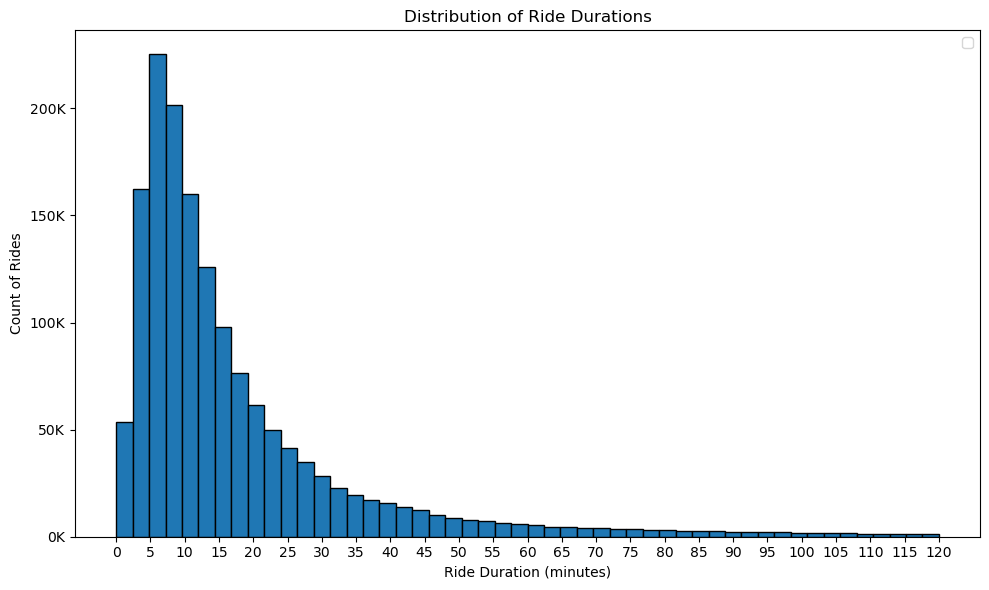

In [84]:
df_full

plt.figure(figsize=(10,6))  # Optional: set figure size for readability
plt.hist(df_top20_rides['ride_duration_min'], bins=50, edgecolor='black')  # bins = how many bars
plt.xlabel('Ride Duration (minutes)')
plt.xticks(range(0, 121, 5))
plt.ylabel('Count of Rides')
plt.title('Distribution of Ride Durations')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-3:.0f}K'))

plt.tight_layout()
plt.legend()
plt.show()


/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_47497/774725438.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


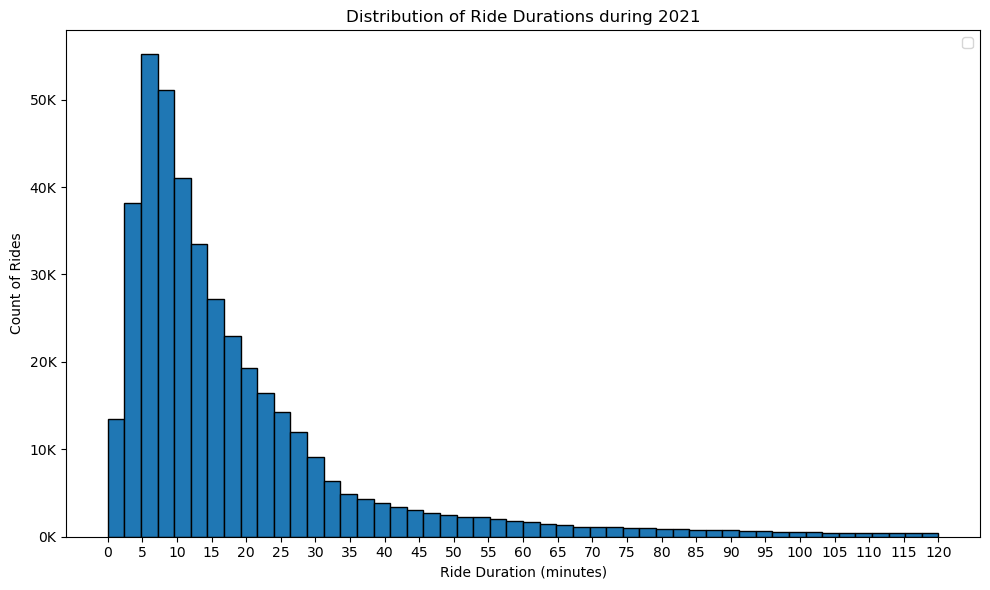

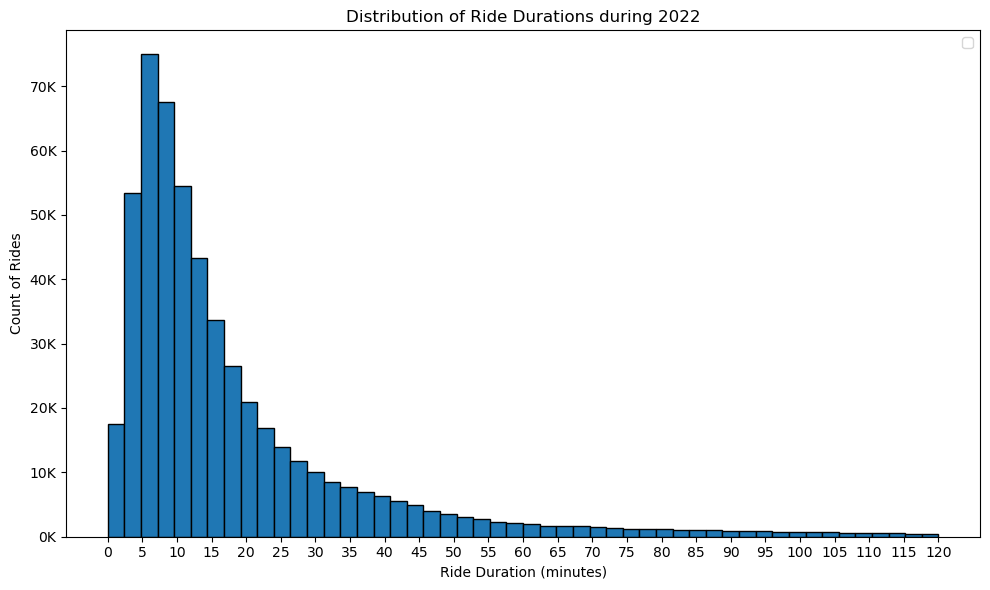

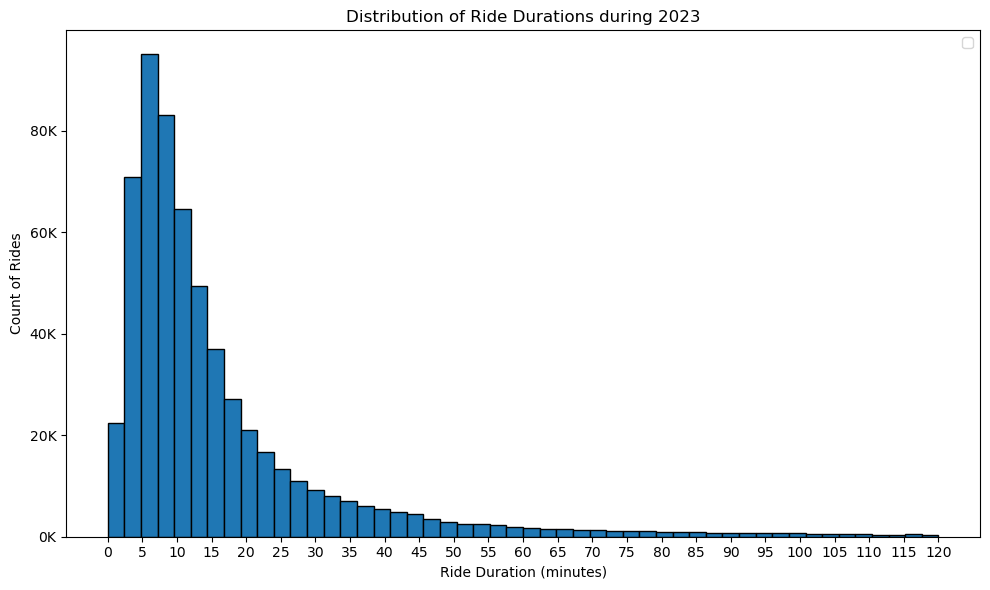

In [88]:
unique_years = sorted(df_full['year'].unique())

for year in unique_years:
    plt.figure(figsize=(10,6))  # Optional: set figure size for readability
    data_year = df_top20_rides[df_top20_rides['year'] == year]
    plt.hist(data_year['ride_duration_min'], bins=50, edgecolor='black')  # bins = how many bars
    plt.xlabel('Ride Duration (minutes)')
    plt.xticks(range(0, 121, 5))
    plt.ylabel('Count of Rides')
    plt.title(f'Distribution of Ride Durations during {year}')

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-3:.0f}K'))

    plt.tight_layout()
    plt.legend()
    plt.show()  

#### Length Ride Weekend vs Weekday

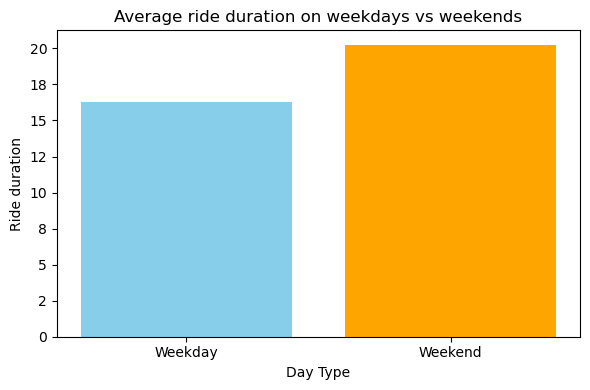

In [89]:
weekday_avg = df_top20_rides[df_top20_rides['day_type'] == 'Weekday']['ride_duration_min'].mean()

weekend_avg = df_top20_rides[df_top20_rides['day_type'] == 'Weekend']['ride_duration_min'].mean()


averages = [weekday_avg, weekend_avg]
labels = ['Weekday', 'Weekend']

plt.figure(figsize=(6,4))
plt.bar(labels, averages, color=['skyblue', 'orange'])

plt.xlabel('Day Type')
plt.ylabel('Ride duration')
plt.title(f'Average ride duration on weekdays vs weekends')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}'))

plt.tight_layout()

plt.show()  


### Thoughts

In [49]:
# Top 10 locations on week and weekend.

# Kind of bike on weekend and week.